In [1]:
import numpy as np
import matplotlib.pyplot as plt
from robust_utils import generate_normal, plot, Logistic_regression, draw_boundary, sigmoid
from tqdm import tqdm
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

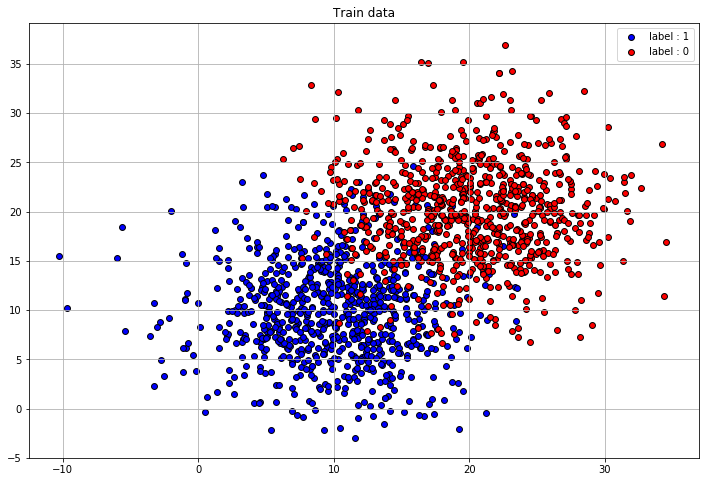

In [56]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.002)
plot(X_train, Y_train)

In [4]:
print(X_val.shape)

(2, 2)


In [5]:
def simple_poison(X, Y, poison_rate):
    '''
    Poison "n_of_poison" number of data points by flipping their labels 
    
    Returns:
    X_poison_train, Y_poison_train
    '''
    
    n_of_poison = int((X.shape[1]) * poison_rate)
    Y_copy = np.copy(Y)
    Y_copy[-n_of_poison:] = 1 - Y_copy[-n_of_poison:]

    return X, Y_copy

def concat_train_val(X_train, Y_train, X_val, Y_val):
    return np.concatenate((X_val, X_train), axis=1), np.concatenate((Y_val, Y_train))

def Normalize(data):
    return (data - data.mean()) / data.std()

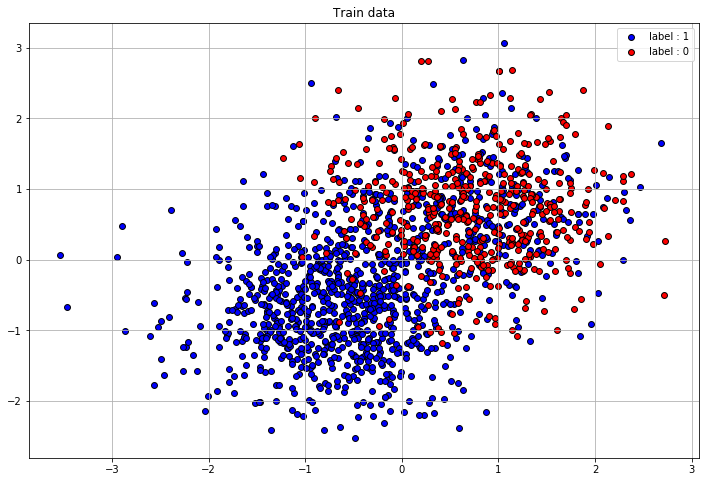

In [6]:
X_train, Y_train_poison = simple_poison(X_train, Y_train, 0.2)
X_train, Y_train_poison = concat_train_val(X_train, Y_train_poison, X_val, Y_val)
X_train = Normalize(X_train)
plot(X_train, Y_train_poison)

100%|██████████| 5000/5000 [00:00<00:00, 24506.88it/s]


train accuracy: 100.0 %
test accuracy: 47.5 %


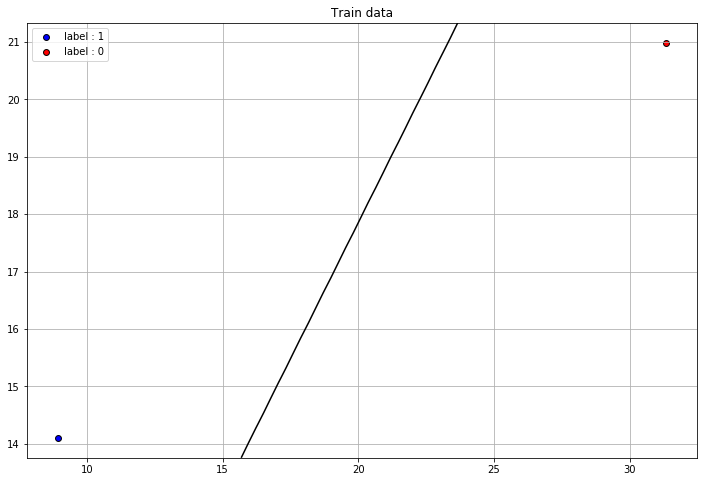

In [7]:
d = Logistic_regression(X_val, Y_val, X_test, Y_test, learning_rate=0.01, num_iterations=5000)
draw_boundary(d['w'], d['b'], X_val, Y_val)

100%|██████████| 5000/5000 [00:00<00:00, 24445.01it/s]


train accuracy: 92.85714285714286 %
test accuracy: 89.5 %


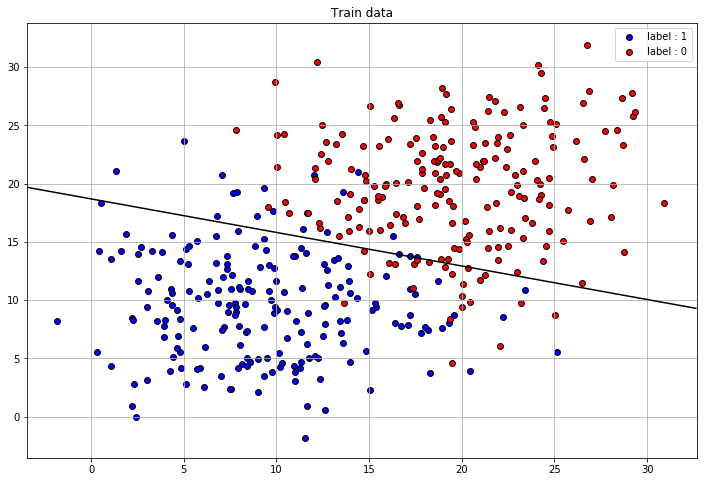

In [8]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.125)
(X_train, Y_train), (X_val, Y_val), (_, _) = generate_normal(n_samples=20, val_portion=0.125)
d = Logistic_regression(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_iterations=5000)
draw_boundary(d['w'], d['b'], X_test, Y_test)

In [9]:
poison_rate = np.linspace(0.1, 1, 10)
accuracies = []
for pr in poison_rate:
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.125)
    (X_train, Y_train), (X_val, Y_val), (_, _) = generate_normal(n_samples=20, val_portion=0.125)
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr)
    # X_train, Y_train_poison = concat_train_val(X_train, Y_train_poison, X_val, Y_val)
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
    d = Logistic_regression(X_train, Y_train_poison, X_test, Y_test, learning_rate=0.01, num_iterations=5000)
    # draw_boundary(d['w'], d['b'], X_train, Y_train_poison)
    accuracies.append(d['test_acc'])
    print(d['w'], d['b'])

 95%|█████████▍| 4731/5000 [00:00<00:00, 23505.09it/s]

train accuracy: 85.71428571428572 %
test accuracy: 88.0 %
[[-1.21631564]
 [-3.17948769]] 1.0464879009732175


 95%|█████████▌| 4771/5000 [00:00<00:00, 23787.44it/s]

train accuracy: 78.57142857142857 %
test accuracy: 77.75 %
[[ 0.11649566]
 [-2.51035649]] 1.392272752477186


 99%|█████████▉| 4965/5000 [00:00<00:00, 25095.33it/s]

train accuracy: 100.0 %
test accuracy: 69.5 %
[[ 0.14324517]
 [-3.0512935 ]] 2.8759642041142754


 97%|█████████▋| 4837/5000 [00:00<00:00, 24102.16it/s]

train accuracy: 92.85714285714286 %
test accuracy: 60.5 %
[[ 0.41228986]
 [-2.49073615]] 3.053964436451868


 47%|████▋     | 2350/5000 [00:00<00:00, 23488.88it/s]

train accuracy: 100.0 %
test accuracy: 50.0 %
[[-0.08507026]
 [ 0.17078713]] 3.9631207028533453
train accuracy: 92.85714285714286 %
test accuracy: 48.75000000000001 %
[[-0.22149353]
 [ 1.57328023]] 2.753958210940477


100%|██████████| 5000/5000 [00:00<00:00, 25637.65it/s]


train accuracy: 92.85714285714286 %
test accuracy: 33.25 %
[[-0.61088116]
 [ 2.84529209]] 2.339933279359423
train accuracy: 85.71428571428572 %
test accuracy: 17.0 %
[[1.7869947 ]
 [2.39294465]] 2.202409519563477


 95%|█████████▌| 4766/5000 [00:00<00:00, 23658.48it/s]

train accuracy: 85.71428571428572 %
test accuracy: 11.0 %
[[1.42898767]
 [3.00735538]] 1.3991114298621503


100%|██████████| 5000/5000 [00:00<00:00, 23747.54it/s]

train accuracy: 85.71428571428572 %
test accuracy: 8.5 %
[[1.34753391]
 [2.90652523]] -0.19279683308047751


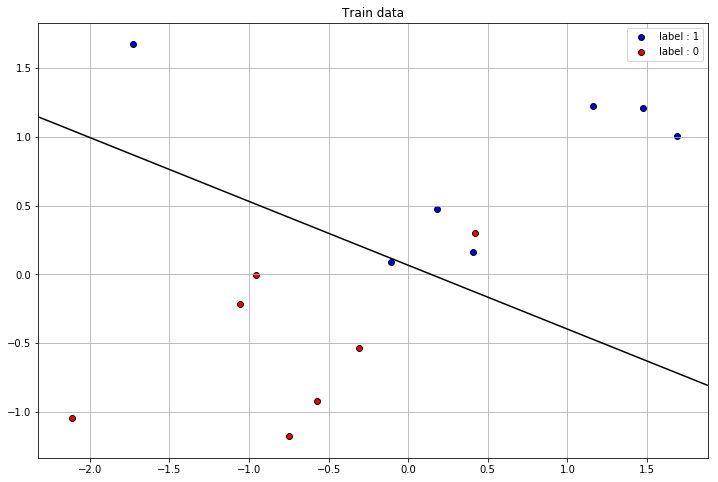

In [10]:
draw_boundary(d['w'], d['b'], X_train, Y_train_poison)

Text(0,0.5,'test accuracy')

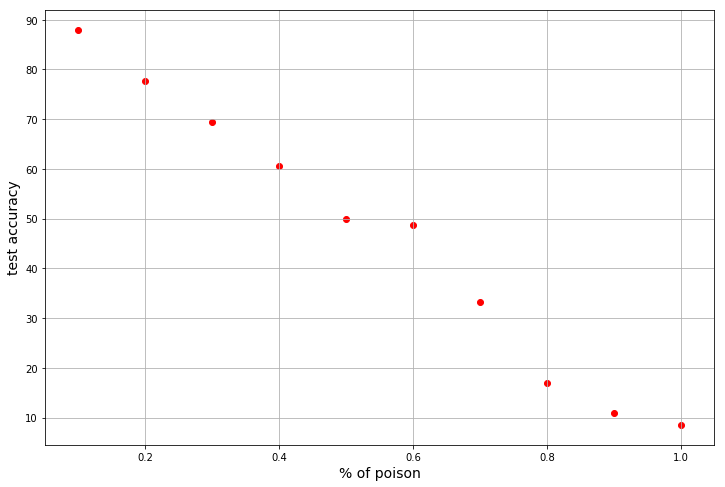

In [11]:
plt.scatter(poison_rate, accuracies, color='r')
plt.grid(True)
plt.xlabel('% of poison', fontsize=14)
plt.ylabel('test accuracy', fontsize=14)

In [14]:
def initialize_weights(dim):
    np.random.seed(0)
    
    w = np.random.randn(dim, 1)
    b = np.random.randn(1).item()

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def forward(w, b, X_train, Y_train, X_val, Y_val):
    
#     eps = 1e-8
    Yhat_t = sigmoid(np.dot(w.T, X_train) + b)
    Yhat_v = sigmoid(np.dot(w.T, X_val) + b)
    
    return Yhat_t, Yhat_v

# def backward_eps(w, b, X_train, Y_train, X_val, Y_val, Yhat_t, Yhat_v):
    
#     eps_g = - 0.001 * (Yhat_t - Y_train).T * X_train.T@X_val@(Yhat_v - Y_val).T
#     mu_tilde = np.maximum(0, -eps_g)
#     if np.sum(mu_tilde) == 0:
#         return mu_tilde
#     return mu_tilde / np.sum(mu_tilde)
    
def backward_eps(w, b, X_train, Y_train, X_val, Y_val, Yhat_t, Yhat_v, alpha):
    
    eps_g = - alpha * (Yhat_t - Y_train).T * X_train.T@X_val@(Yhat_v - Y_val).T
    return eps_g

def backward_params(w, b, mu, X, Y, Yhat):

    dw = np.dot(X, mu * ((Yhat - Y).T))
    db = np.dot((Yhat - Y), mu)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads

def fit(w, b, X_train, Y_train, X_val, Y_val, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    batch_size = X_val.shape[1]
    mu = np.zeros_like(Y_train).reshape(-1, 1)
    
    for i in tqdm(range(num_iterations)):
        Yhat_t, Yhat_v = forward(w, b, X_train, Y_train, X_val, Y_val)
        # print(mu[:10])
        grads = backward_params(w, b, mu, X_train, Y_train, Yhat_t)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        dmu = backward_eps(w, b, X_train, Y_train, X_val, Y_val, Yhat_t, Yhat_v, learning_rate)
        mu = mu - learning_rate*dmu
        mu = np.maximum(0, mu)
        if np.sum(mu) != 0:
            mu = mu / np.sum(mu)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db,
             "mu": mu}
    
    return params, grads, costs


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    assert(w.shape[0] == X.shape[0])
    
    ### START CODE HERE ### (≈ 4 line of code)
    Yhat = sigmoid(np.dot(w.T, X) + b)
    Yhat[Yhat > 0.5] = 1
    Yhat[Yhat <= 0.5] = 0
    Y_prediction = Yhat
    ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

# GRADED FUNCTION: model

def robust_train(X_train, Y_train, X_val, Y_val, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_weights(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = fit(w, b, X_train, Y_train, X_val, Y_val, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    mu = grads["mu"]
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_acc))
    print("test accuracy: {} %".format(test_acc))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_acc":train_acc,
         "test_acc":test_acc,
         "mu": mu,}
    
    return d

In [25]:
temp = []

In [34]:
model_history = []
poison_rate = np.linspace(0.3, 0.9, 7)
accuracies_l2w = []

val_portion = 0.25

for pr in poison_rate:
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.1)
    (X_train, Y_train), (X_val, Y_val), (_, _) = generate_normal(n_samples=200, val_portion=val_portion)
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr)
#     X_train, Y_train_poison = concat_train_val(X_train, Y_train_poison, X_val, Y_val)
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
    d = robust_train(X_train, Y_train_poison, X_val, Y_val, X_test, Y_test, learning_rate=0.001, num_iterations=10000)
    accuracies_l2w.append(d['test_acc'])
    model_history.append(d)
#     print(d['w'], d['b'])
#     print(d["grads"]["mu"])
temp.append(accuracies_l2w)

 15%|█▍        | 1469/10000 [00:00<00:00, 14684.83it/s]

train accuracy: 74.16666666666666 %
test accuracy: 93.25 %


 15%|█▍        | 1480/10000 [00:00<00:00, 14793.77it/s]

train accuracy: 64.16666666666666 %
test accuracy: 87.75 %


 15%|█▍        | 1478/10000 [00:00<00:00, 14776.95it/s]

train accuracy: 100.0 %
test accuracy: 50.0 %


 15%|█▍        | 1477/10000 [00:00<00:00, 14766.07it/s]

train accuracy: 90.0 %
test accuracy: 50.25 %


 14%|█▍        | 1401/10000 [00:00<00:00, 14001.77it/s]

train accuracy: 62.5 %
test accuracy: 68.0 %


 14%|█▍        | 1449/10000 [00:00<00:00, 14486.97it/s]

train accuracy: 44.99999999999999 %
test accuracy: 74.0 %


100%|██████████| 10000/10000 [00:00<00:00, 14350.39it/s]

train accuracy: 28.33333333333333 %
test accuracy: 82.0 %


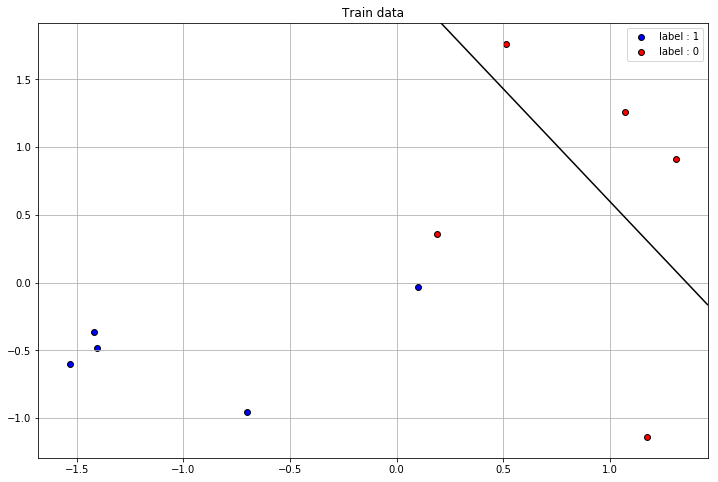

In [21]:
draw_boundary(d['w'], d['b'], X_val, Y_val)

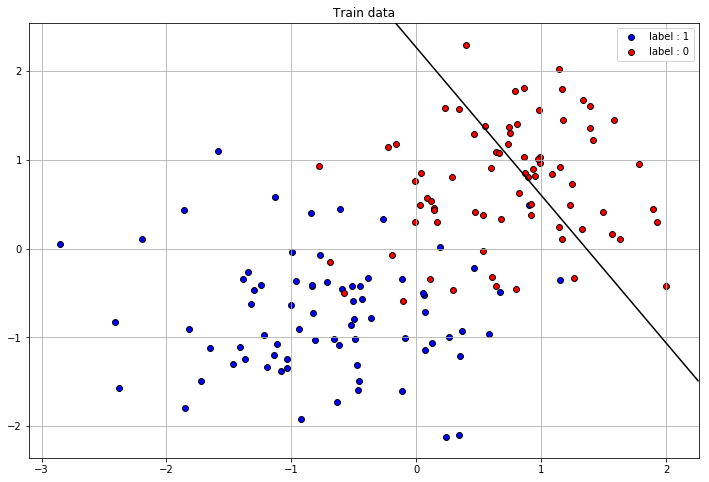

In [23]:
draw_boundary(d['w'], d['b'], X_train, Y_train)

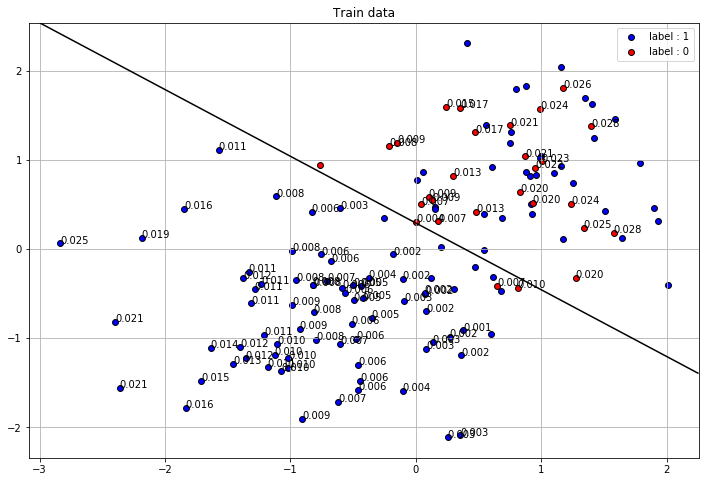

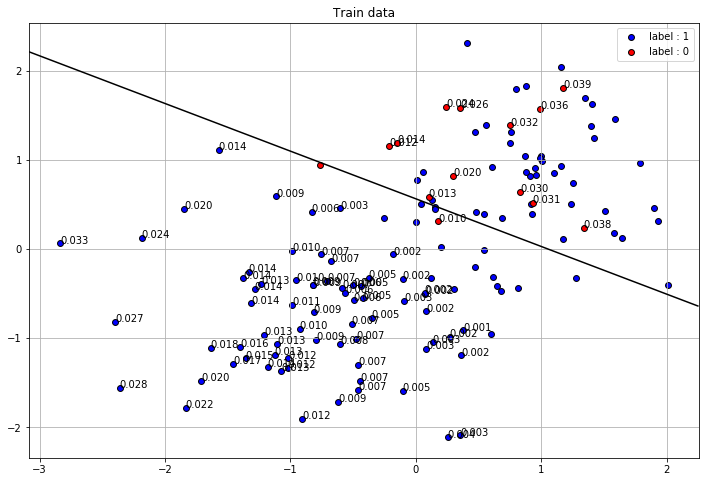

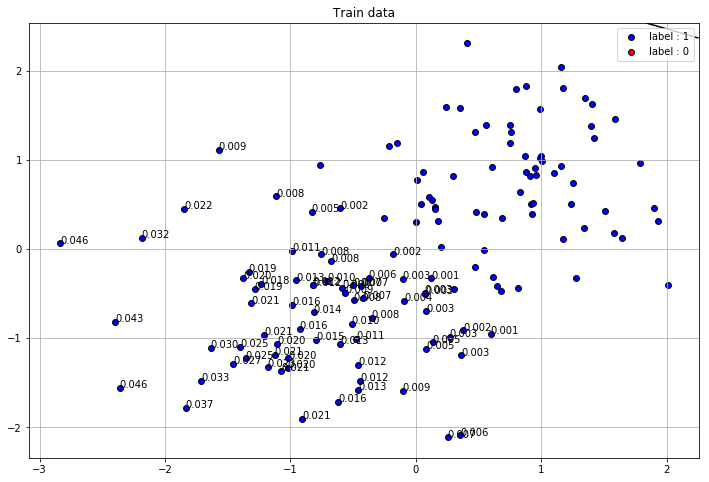

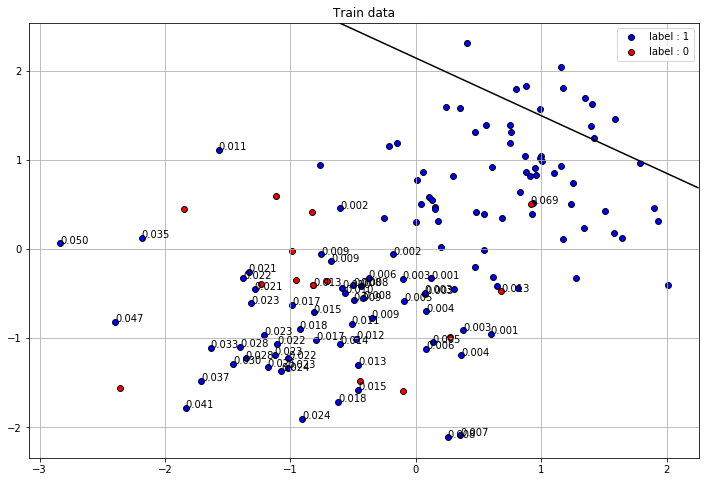

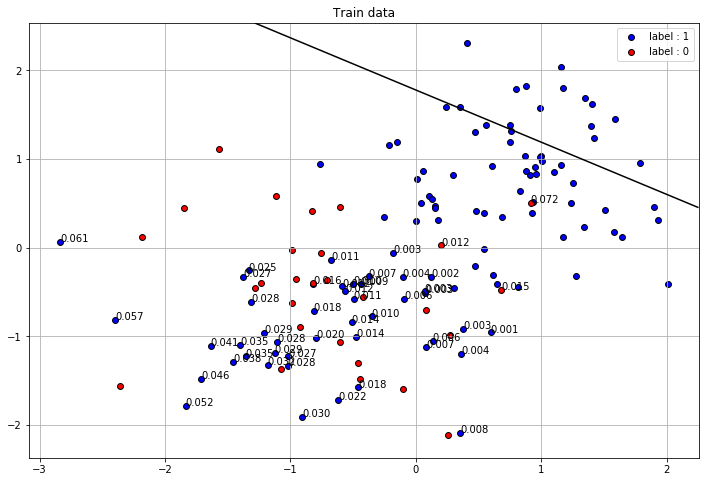

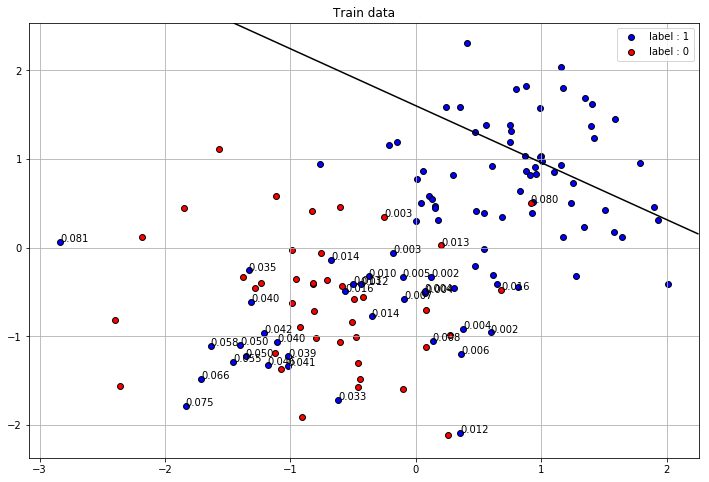

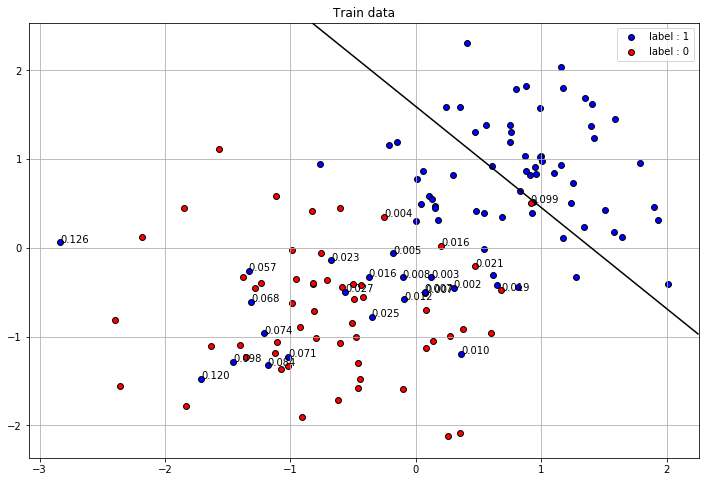

In [27]:
val_portion = 0.125

for i, pr in enumerate(poison_rate):
    # (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.002)
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=2000, val_portion=0.1)
    (X_train, Y_train), (X_val, Y_val), (_, _) = generate_normal(n_samples=200, val_portion=val_portion)
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr)
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
    
    d = model_history[i]
#     print(d['w'])
#     print(d['b'])
#     print()
    draw_boundary(d['w'], d['b'], X_train, Y_train_poison)
    
    ax = plt.gca()
    x = X_train[0, :]
    y = X_train[1, :]
    for i, xy in enumerate(zip(x, y)):
        if d["mu"][i] > 0.001:
            ax.annotate("{:.3f}".format(float(d["mu"][i])), xy=xy, textcoords="data")
    plt.show()

ValueError: x and y must be the same size

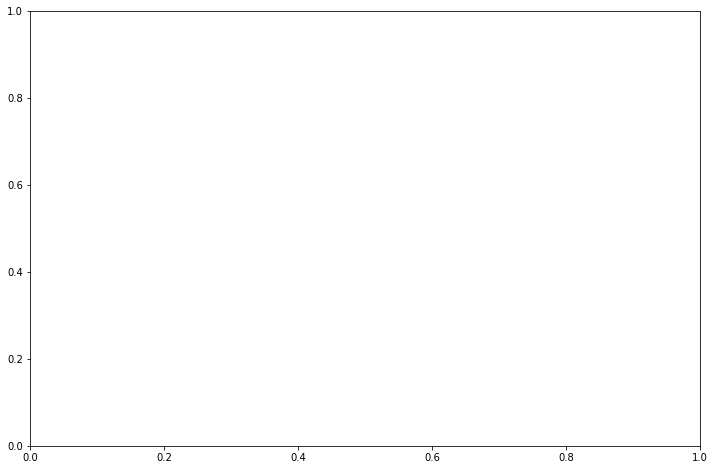

In [17]:
plt.scatter(poison_rate, accuracies, color='r', label = 'logistic regression')
plt.scatter(poison_rate, accuracies_l2w, color='b', label = 'learning to reweight')
plt.grid(True)
plt.xlabel('% of poison', fontsize=14)
plt.ylabel('test accuracy', fontsize=14)
plt.legend()

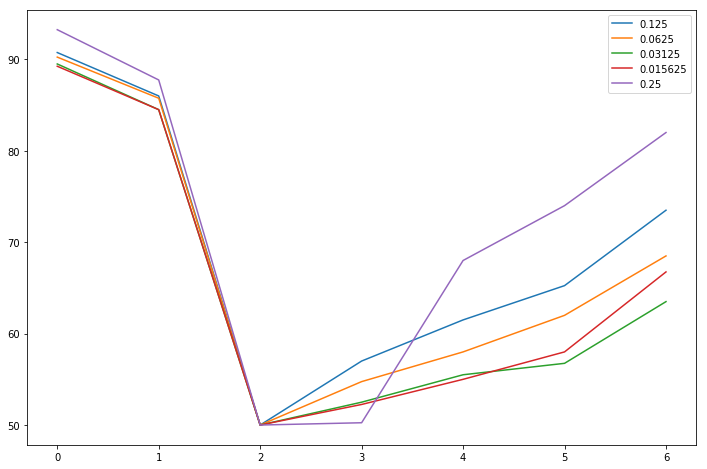

In [35]:
plt.plot(temp[0], label="0.125")
plt.plot(temp[1], label="0.0625")
plt.plot(temp[2], label="0.03125")
plt.plot(temp[3], label="0.015625")
plt.plot(temp[4], label="0.25")
plt.legend()
plt.show()

In [14]:
d["mu"].shape

(1400, 1)

In [12]:
np.mean(d["mu"])

0.0007142857142857143

In [13]:
np.sum(d["mu"]>0.00008)

749